In [1]:
#Dana notes - in histogram_sample_2d.py, in the make_control function, you can modify n_targets to get a different number of targets from the CTL. It's currently set to get 10x the number of inputted targets.



tess_data = 'TOI_Mar2025_1pt5to4_R.csv'


# Sampling with 2D histogram

In [2]:
import numpy as np
import pandas as pd
import os, sys #, glob
from dotmap import DotMap

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['axes.formatter.min_exponent'] = 3

In [4]:
sys.path.append('./')
from tess_catalogs import astroquery_TOIs, CTL

In [5]:
sys.path.append('./')
from histogram_sample_2d import Samples

In [6]:
#for bugfixing, add %autoreload at top of of cell to trigger
# note: autoreload occasionally fs up working dir 
%load_ext autoreload
#%autoreload 2 # reload automatically, does not work?
%aimport histogram_sample_2d
#Samples= histogram_sample_2d.Samples

## read in data

### Target sample: TOIs from exoplanet archive

In [7]:
# function queries TOIs from archive, replace here
#toi = astroquery_TOIs(date='12-03-2025', Save_to_file=False) # forces redo #Gijs's version
toi_data = pd.read_csv(tess_data)
toi = DotMap(
    Rst=toi_data['st_rad'].values,
    Teff=toi_data['st_teff'].values,
   #d=toi_data['d'].values,
    Tmag=toi_data['st_tmag'].values,
    tic=toi_data['tid'].values
)

## Parent sample: CTL

In [8]:
#same as above cell w CTL, just numpy arrays of stuff
ctl= CTL(date = '2025April29')


Read from file: CTL_2025April29.npz


## Analyze / visualize

In [9]:
cat= histogram_sample_2d.Samples('TOI CTL')
cat.xlabel= 'Rst [Rsun]'
cat.ylabel= 'Magnitude'
cat.zlabel= 'Teff [K]'

In [10]:
cat.set_parent('CTL', ctl.Rst, ctl.Tmag, extra= ctl.Teff, ID=ctl.tic) #Can change variables from Rst, etc. 
#extra control variable

In [11]:
cat.set_target('TOI', toi.Rst, toi.Tmag, extra= toi.Teff, ID=toi.tic)

In [12]:
ctl.tic.size, toi.tic.size

(9194582, 1224)

In [13]:
ctl_in_toi= np.isin(ctl.tic, toi.tic)
ctl_in_toi.sum(), ctl_in_toi.size

(1054, 9194582)

In [14]:
cat.set_xbins(0.1,5,21)
cat.set_ybins(6,13,20, Log=False)
cat.set_zbins(2000,12000,21, Log=False)
#SETS VARIABLE RANGES, anything outside the bounds are not used for the calculation in the grid

1224/1224,  left: 0, right: 0
9193743/9194582,  left: 10, right: 829
KstestResult(statistic=0.2486523553314588, pvalue=3.74222819814582e-67)


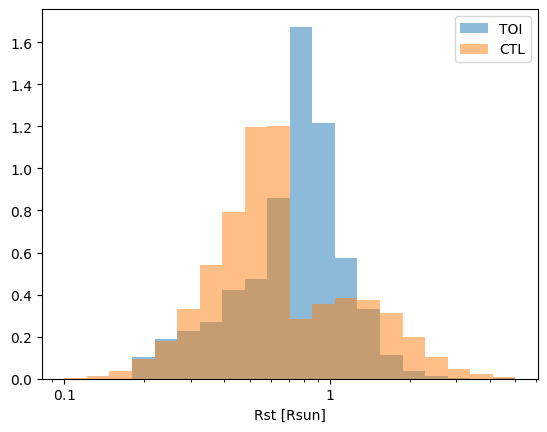

In [15]:
%autoreload
cat.plothist_x()
#comparing distributions

1191/1224,  under: 9, over: 24
5574167/9194582,  under: 2148, over: 3618267
KstestResult(statistic=0.6745103481465882, pvalue=0.0)


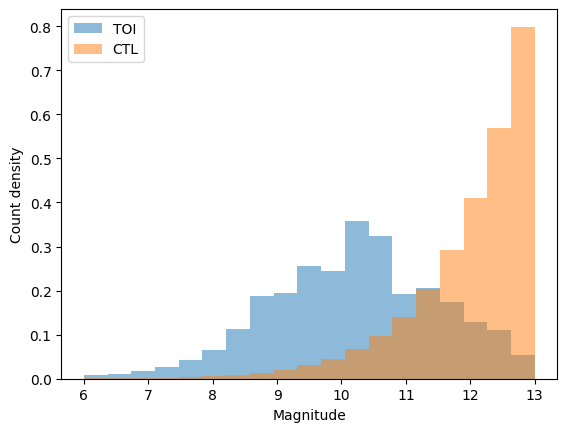

In [16]:
%autoreload
cat.plothist_y()

before: KstestResult(statistic=0.2433243955889607, pvalue=2.752904952129815e-64)


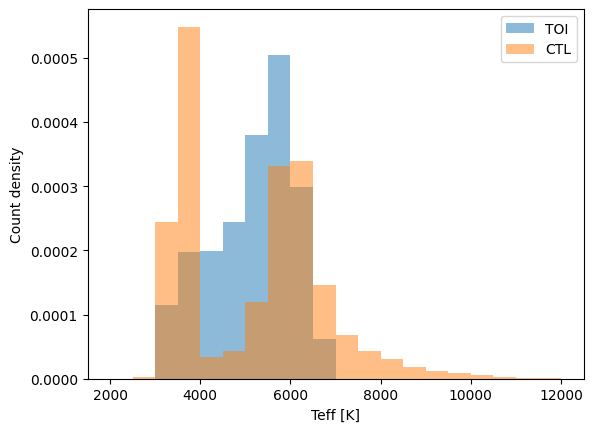

In [17]:
%autoreload
cat.plothist_z()

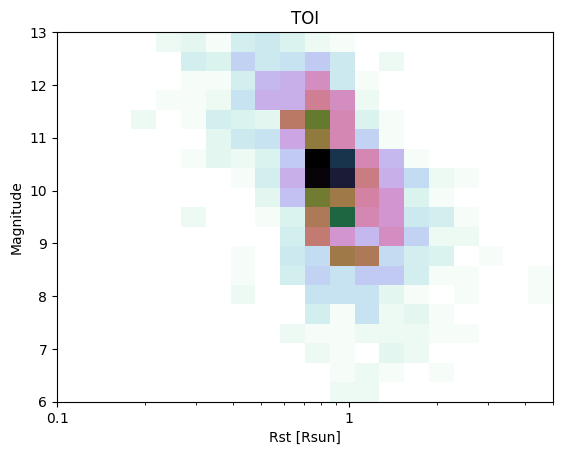

In [18]:
%autoreload
cat.hist2d_target()

#There is a second peak at 10.5 Magnitude because a lot of directed star searches, faint star search and SPOC maybe, but not sure

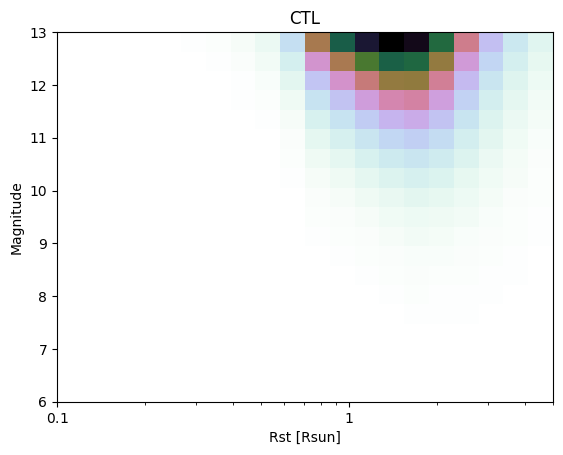

In [19]:
%autoreload
cat.hist2d_parent()

all 380 cells oversampled :)


/Users/danayaptangco/Desktop/inj_rec_yaptangco/1_get_sample/histogram_sample_2d.py:271: RuntimeWarning: invalid value encountered in true_divide
  ratio2d= 1.0/scale * self.target.h2d / self.parent.h2d


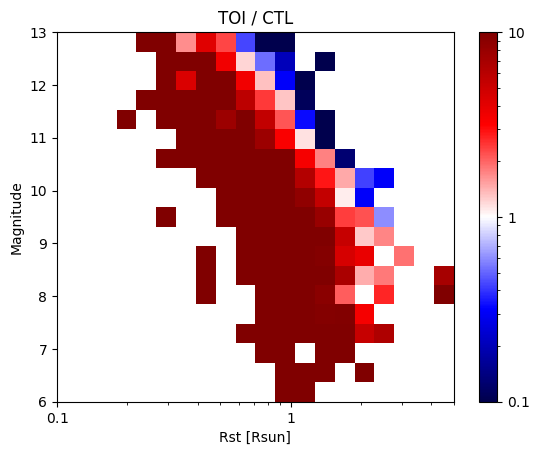

In [20]:
%autoreload
cat.hist2d_compare()

#good to be oversampled bc we can draw from CTL, maybe color bar is divided by median or something but is oversampled

In [21]:
%autoreload
idraw= cat.make_control(ID=True) #ID true means use IDs, leave it as true to keep it off, oversampled means that it won't take any stars twice

missing 32/1224
trimming parent sample 9193528/9194582

all 380 cells oversampled :)


/Users/danayaptangco/Desktop/inj_rec_yaptangco/1_get_sample/histogram_sample_2d.py:372: RuntimeWarning: invalid value encountered in long_scalars
  self.parent.draw_prob[indices_to_draw_from]= n_target/TF_parent.sum()


Draw with replacement 6,10
Draw with replacement 8,6

summed weights parent sample: n=11909.999999999989

control sample n=11910


148/380 are off


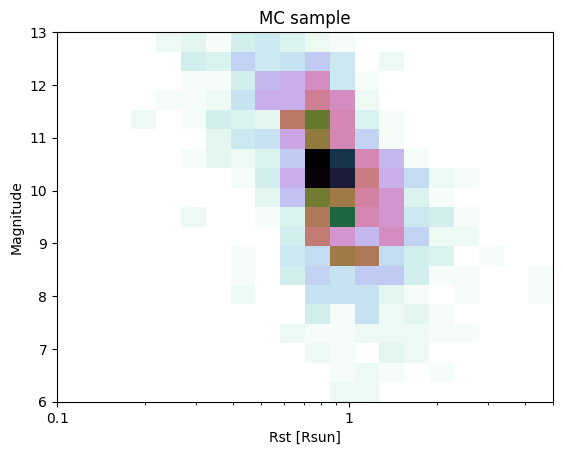

In [22]:
%autoreload
cat.hist2d_draw() #This is from CTL but now looks like TOI

In [23]:
%autoreload
cat.verify_control() #KS tests

xvar: 
 distance: 0.516 -> 0.027
 probability: 2.84e-295 -> 0.381

yvar: 
 distance: 0.605 -> 0.016
 probability: 0 -> 0.944

zvar: 
 distance: 0.418 -> 0.048
 probability: 3.12e-189 -> 0.0129


1224/1224,  left: 0, right: 0
11910/11910,  left: 0, right: 0


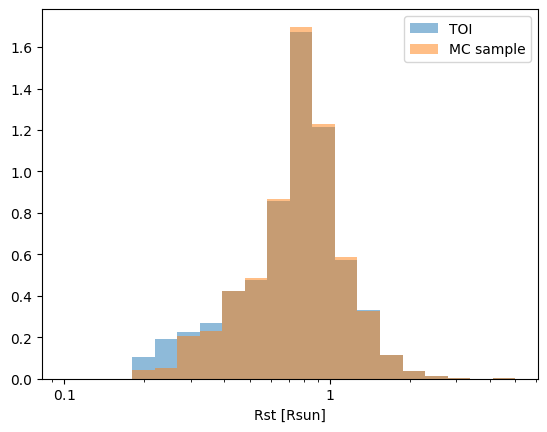

In [24]:
cat.plothist_x(Draw=True, Parent=False)
# note: TOI sample does not use y cuts
#So these aren't representative of the new sample exactly



1191/1224,  under: 9, over: 24
11910/11910,  under: 0, over: 0


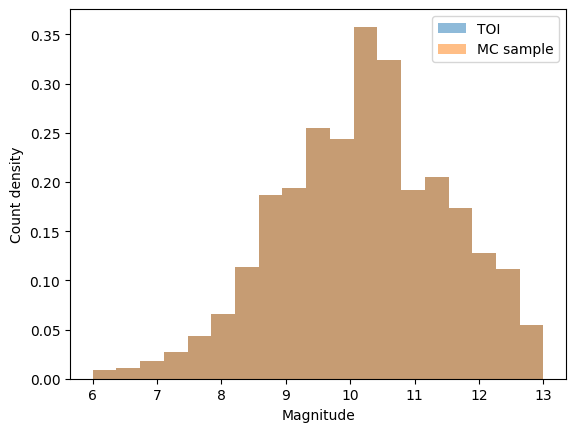

In [25]:
cat.plothist_y(Draw=True, Parent=False)

after: KstestResult(statistic=0.04811083123425686, pvalue=0.012854836727035215)


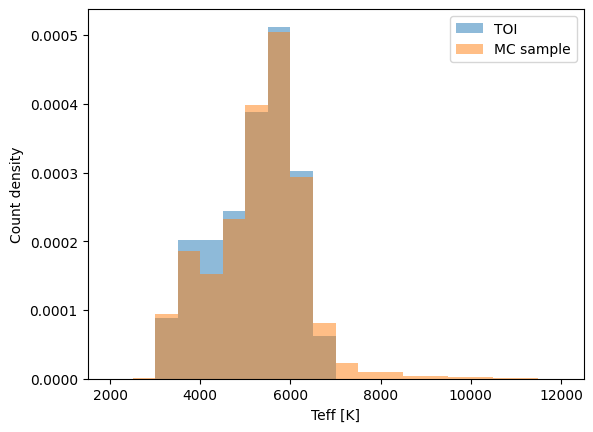

In [26]:
%autoreload
cat.plothist_z(Draw=True, Parent=False)

In [27]:
import numpy as np
import pandas as pd

# Convert ctl arrays to numpy arrays (to ensure consistency)
ctl_df = pd.DataFrame({
    'id': np.array(ctl.tic),
    'tmag': np.array(ctl.Tmag),
    'RAD': np.array(ctl.Rst),
    'MASS': np.array(ctl.Mst),
    'teff': np.array(ctl.Teff),
    'lst': np.array(ctl.Lst),
    'distance': np.array(ctl.d),
    'gaia': np.array(ctl.gaia),

})

# Extract drawn TIC IDs from your sample
drawn_tic_ids = cat.draw['ID']

# Create DataFrame with drawn TICs
draw_df = pd.DataFrame({'id': drawn_tic_ids})

# Merge to get properties for drawn TICs
merged_df = pd.merge(draw_df, ctl_df, on='id', how='left')

# Save the merged table to CSV
merged_df.to_csv('stellar_params_CTL.csv', index=False)
# Also save to the injection folder
merged_df.to_csv('../2_injection/stellar_params_CTL.csv', index=False)

# Also save to the geryon import folder
merged_df.to_csv('../2_injection/3_import_to_geryon/stellar_params_CTL.csv', index=False)

# Also save to the recovery heatmaps folder
merged_df.to_csv('../3_recovery_heatmaps/stellar_params_CTL.csv', index=False)

print(f"Saved control sample to stellar_params_CTL.csv")
print(f"Saved to ../2_injection/stellar_params_CTL.csv")
print(f"Saved to ../2_injection/3_import_to_geryon/stellar_params_CTL.csv")
print(f"Saved to ../3_recovery_heatmaps/stellar_params_CTL.csv")



Saved control sample to stellar_params_CTL.csv
Saved to ../2_injection/stellar_params_CTL.csv
Saved to ../2_injection/3_import_to_geryon/stellar_params_CTL.csv
Saved to ../3_recovery_heatmaps/stellar_params_CTL.csv
